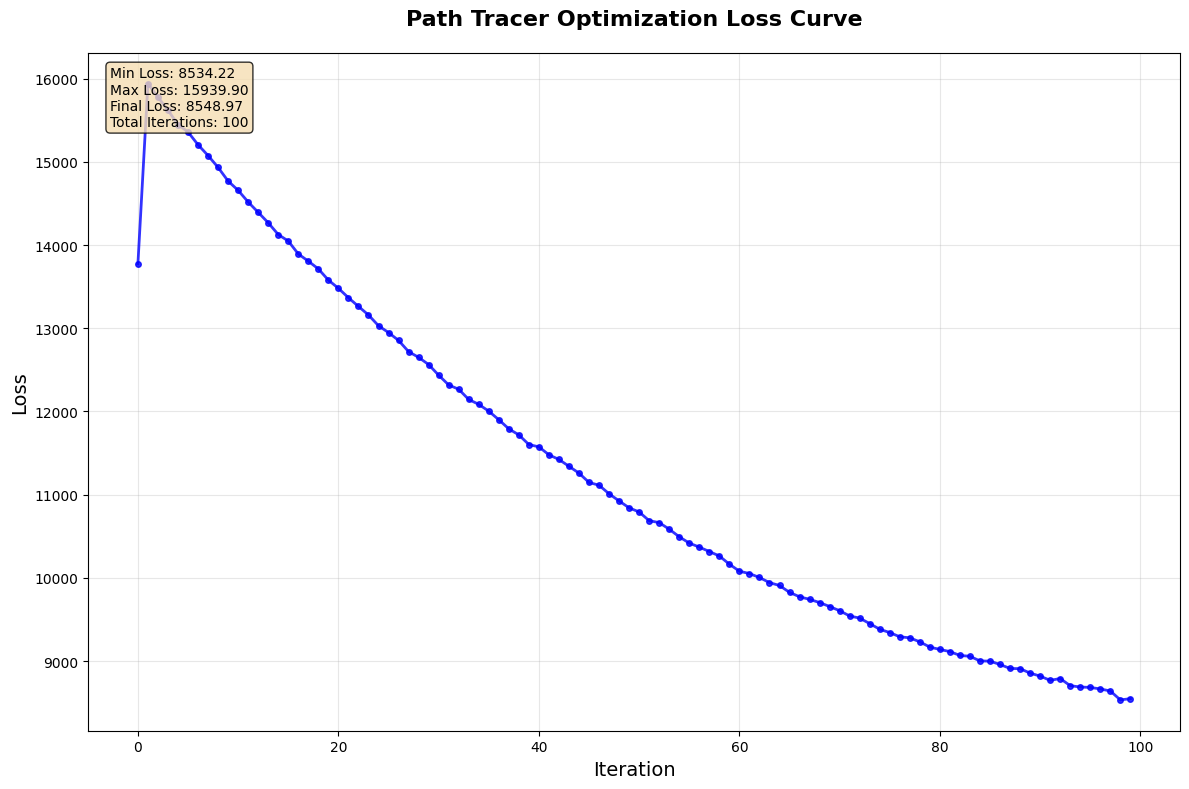

Loaded 100 data points from ../output/loss.txt
Loss decreased from 13773.50 to 8548.97
Total improvement: 37.9%


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Path to the loss file
loss_file_path = "../output/loss.txt"

# Check if the file exists
if not os.path.exists(loss_file_path):
    print(f"Loss file not found at {loss_file_path}")
    print("Make sure to run the path tracer first to generate the loss data.")
else:
    # Read the loss data
    iterations = []
    losses = []
    
    with open(loss_file_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) == 2:
                iteration = int(parts[0])
                loss = float(parts[1])
                iterations.append(iteration)
                losses.append(loss)
    
    if len(iterations) > 0:
        # Create a nice looking plot
        plt.figure(figsize=(12, 8))
        plt.plot(iterations, losses, 'b-', linewidth=2, marker='o', markersize=4, alpha=0.8)
        
        # Styling
        plt.title('Inverse Path Tracer Optimization', fontsize=16, fontweight='bold', pad=20)
        plt.xlabel('Iteration', fontsize=14)
        plt.ylabel('Loss', fontsize=14)
        plt.grid(True, alpha=0.3)
        
        # Add some statistics as text
        min_loss = min(losses)
        max_loss = max(losses)
        final_loss = losses[-1]
        
        stats_text = f'Min Loss: {min_loss:.2f}\nMax Loss: {max_loss:.2f}\nFinal Loss: {final_loss:.2f}\nTotal Iterations: {len(iterations)}'
        plt.text(0.82, 0.98, stats_text, transform=plt.gca().transAxes, 
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
        
        # Use log scale if loss values span multiple orders of magnitude
        if max_loss / min_loss > 100:
            plt.yscale('log')
            plt.ylabel('Loss (log scale)', fontsize=14)
        
        plt.tight_layout()
        plt.show()
        
        print(f"Loaded {len(iterations)} data points from {loss_file_path}")
        print(f"Loss decreased from {losses[0]:.2f} to {final_loss:.2f}")
        if len(losses) > 1:
            improvement = ((losses[0] - final_loss) / losses[0]) * 100
            print(f"Total improvement: {improvement:.1f}%")
    else:
        print("No valid data found in the loss file.")